In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

#### Read data

In [16]:
df = pd.read_csv('../../../datasets/parte2/treino/dataset_prepared.csv', na_filter=False)

#### X and y arrays

In [17]:
X = df.drop('injection', axis=1)
y = df['injection']

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

#### Training 

Using GridSearchCV to find the best hyperparameters

In [19]:
# Use GridSearchCV para encontrar os melhores hiperparâmetros
param_grid = {
    'criterion': ['gini', 'entropy', 'ratio', 'log_loss'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf = DecisionTreeClassifier(random_state=2023)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, refit=True, cv=5, verbose=2, n_jobs=-1) # scoring='f1'
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
315 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
139 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\gui\anaconda3\envs\DAA\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\gu

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2023),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'ratio', 'log_loss'],
                         'max_depth': [None, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

Inspect the best parameters

In [20]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

Get the best estimator

In [21]:
clf = grid_search.best_estimator_

Get the predictions using the trained model

In [22]:
predictions = clf.predict(X_test)

#### Model Evaluation

Classification report

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.61      0.68      0.64       303
         Low       0.42      0.41      0.41       135
      Medium       0.56      0.53      0.55       316
        None       0.97      0.97      0.97      2377
   Very High       0.77      0.75      0.76       174

    accuracy                           0.87      3305
   macro avg       0.67      0.67      0.67      3305
weighted avg       0.87      0.87      0.87      3305



Accuracy Score

In [24]:
accuracy_score(y_test, predictions)

0.8659606656580938

Confusion Matrix

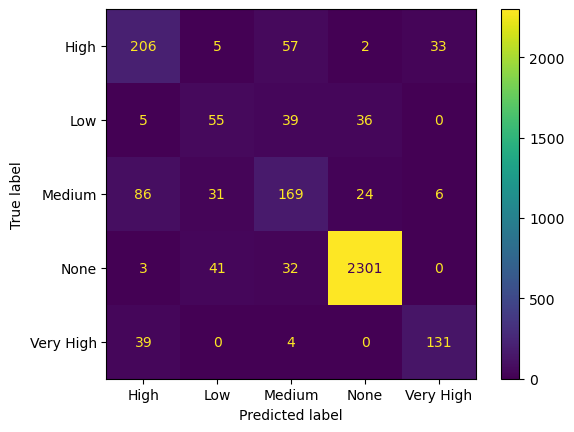

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [26]:
#df_predicoes = pd.DataFrame({'Result': predictions})
#df_predicoes['RowId'] = range(1, len(predictions) + 1)
#df_predicoes = df_predicoes[['RowId', 'Result']]

#df_predicoes.to_csv('../../../datasets/parte2/teste/previsoesDecisionTreeClassifier.csv', index=False)